Assignment on Classification


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('/content/iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

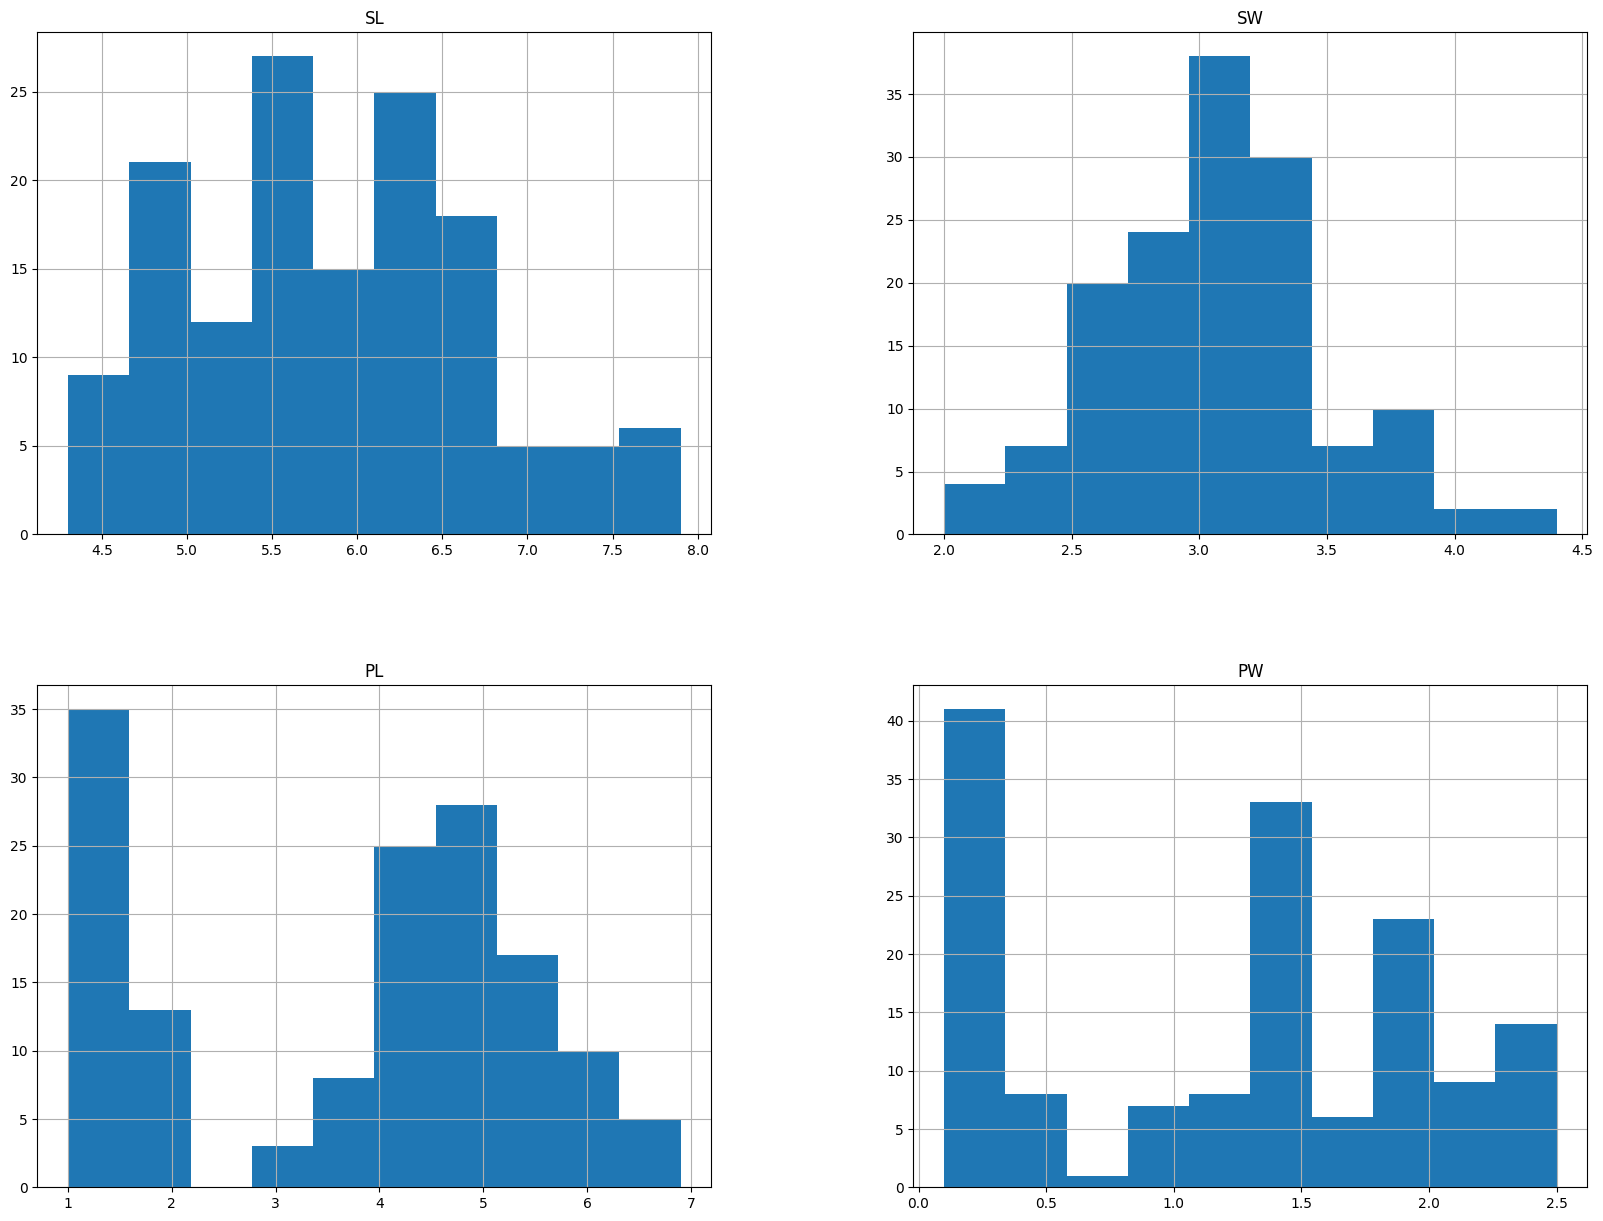

In [ ]:
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

In [ ]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [7]:
data


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

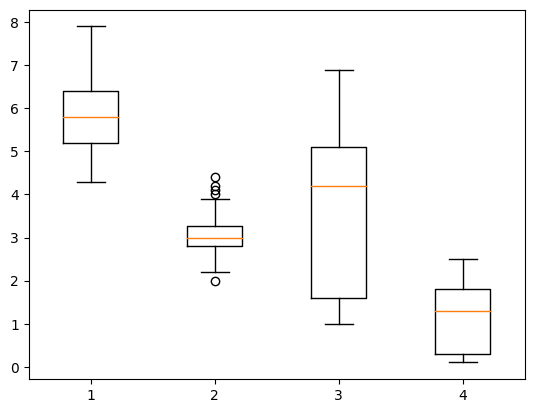

In [9]:
#checking outliers
num_columns=['SL','SW','PL','PW']
plt.boxplot(data[num_columns])
plt.show()

In [ ]:
#standerd scaling
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_sc=sc.fit_transform(x)
#x_sc=pd.DataFrame(x_sc)

In [10]:
#handling outliers
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')

In [11]:
IQR=Q3-Q1

In [13]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [14]:
outlier=[]
for x in data['SW']:
  if((x<low_lim)or(x>up_lim)):
    outlier.append(x)

print (outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [15]:
data['SW']=data['SW'].clip(lower=low_lim,upper=up_lim)


In [16]:
outlier=[]
for x in data['SW']:
  if((x<low_lim)or(x>up_lim)):
    outlier.append(x)

print (outlier)

[]


In [17]:
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.100153,0.831400,0.800726,0.773593
SW,-0.100153,1.000000,-0.411147,-0.336800,-0.404670
PL,0.831400,-0.411147,1.000000,0.936389,0.929629
PW,0.800726,-0.336800,0.936389,1.000000,0.956464
Classification,0.773593,-0.404670,0.929629,0.956464,1.000000


<Axes: >

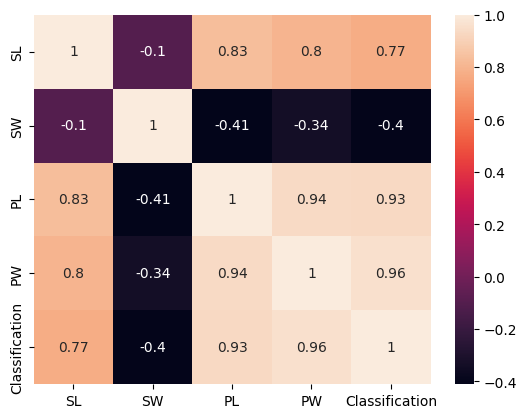

In [18]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#data=pd.read_excel('/content/iris.xls')
#x1=data.drop(['Classification'],axis=1)

In [19]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

Linear Regression

In [21]:
from sklearn import linear_model
lin_model= linear_model.LinearRegression()
model_iris=lin_model.fit(x_train,y_train)
pred_iris=model_iris.predict(x_test)


In [22]:
pred_iris

array([ 1.16288349e+00, -2.72800418e-02,  2.29566097e+00,  1.34513526e+00,
        1.33754221e+00,  9.07798786e-02,  1.08832353e+00,  1.97051544e+00,
        1.47423038e+00,  1.08645137e+00,  1.74149052e+00, -8.51311958e-02,
       -9.65801082e-02, -8.99432114e-02, -6.14792095e-02,  1.27246173e+00,
        2.00387860e+00,  1.04339964e+00,  1.20746389e+00,  2.01552647e+00,
       -2.60948585e-02,  1.59760310e+00,  9.37125885e-02,  1.94079458e+00,
        1.80600560e+00,  2.01648976e+00,  1.79831834e+00,  2.05998223e+00,
        6.43325761e-02, -6.20709815e-03, -1.65742781e-01,  3.06580978e-03,
        1.23781434e+00, -5.97988617e-02,  2.05626307e-01,  1.77673034e+00,
        1.28862803e+00, -8.37924419e-05])

In [24]:
from sklearn.metrics import r2_score
print('r2_score :',r2_score(y_test,pred_iris))

r2_score : 0.950080311281813


In [23]:
#check goodness of model
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,pred_iris))

MSE: 0.03515811871634087


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [26]:
log_reg.fit(x_train,y_train)
y_log_pred=log_reg.predict(x_test)
y_log_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_log_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [54]:
print('accuracy :',accuracy_score(y_test,y_log_pred))
print('precision :',precision_score(y_test,y_log_pred,average='micro'))
print('recall :',recall_score(y_test,y_log_pred,average='micro'))
print('f1 :',f1_score(y_test,y_log_pred,average='micro'))

accuracy : 0.9736842105263158
precision : 0.9736842105263158
recall : 0.9736842105263158
f1 : 0.9736842105263158


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [57]:
log_reg.fit(x_train,y_train)
y_log_pred=log_reg.predict(x_test)
y_log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [63]:
confusion_matrix(y_test,y_log_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [66]:
print('accuracy :',accuracy_score(y_test,y_log_pred))
print('precision :',precision_score(y_test,y_log_pred,average='micro'))
print('recall :',recall_score(y_test,y_log_pred,average='micro'))
print('f1 :',f1_score(y_test,y_log_pred,average='micro'))

accuracy : 0.9736842105263158
precision : 0.9736842105263158
recall : 0.9736842105263158
f1 : 0.9736842105263158


KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,20)

In [35]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

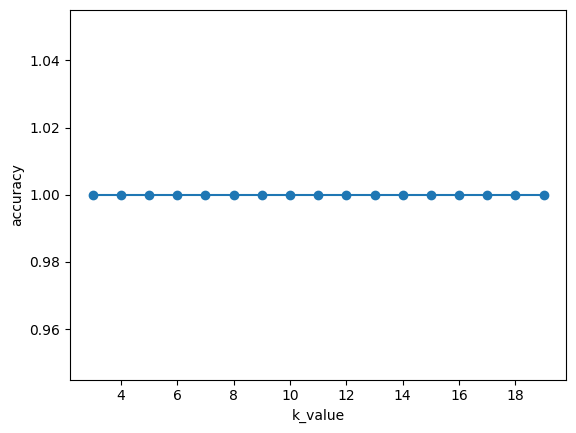

In [36]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [37]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [67]:
print('accuracy :',accuracy_score(y_test,y_pred_knn))
print('precision :',precision_score(y_test,y_pred_knn,average='micro'))
print('recall :',recall_score(y_test,y_pred_knn,average='micro'))
print('f1 :',f1_score(y_test,y_pred_knn,average='micro'))

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0


SVM

In [39]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred=sv_cl.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.9736842105263158


DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [43]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


RANDOMFOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [46]:
y_pred=rf_clf1.predict(x_test)

In [47]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 1.0


KNN,DECISION TREE,RANDOMFOREST ARE THE BEST MODELS